In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.filters import threshold_otsu

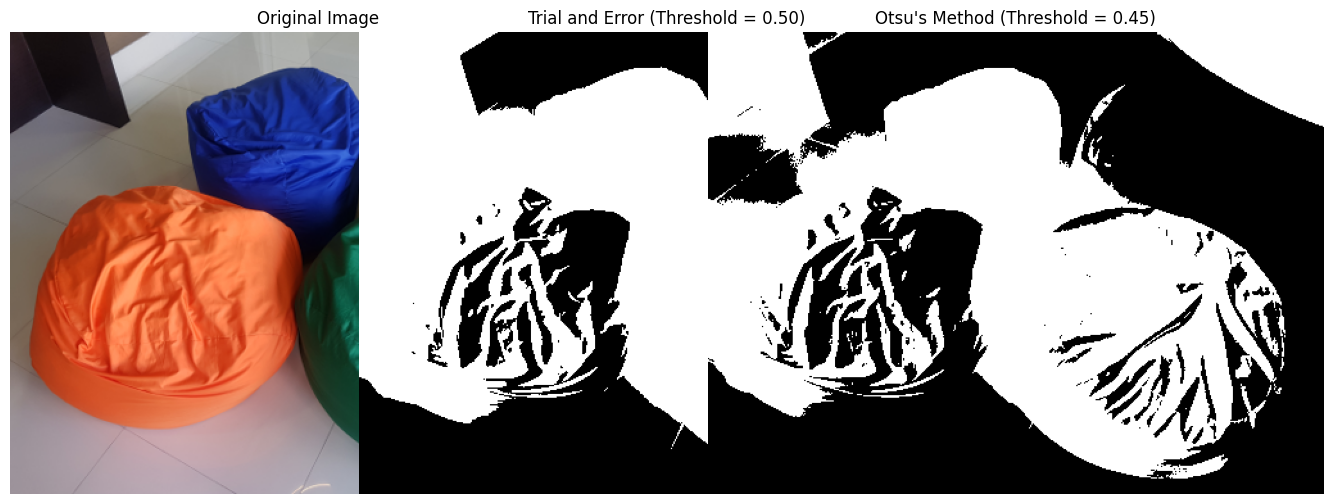

In [18]:
img_test1 = imread('bags.png')
img_test1_gs = rgb2gray(img_test1)

# After several trial and error this is the best threshold
th = 0.50
img_test1_bn = img_test1_gs < th

# Using Otsu's Method
th_otsu = threshold_otsu(img_test1_gs)
img_test1_otsu = img_test1_gs < th_otsu

# Plot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=-0.5)
ax[0].set_title("Original Image")
ax[0].imshow(img_test1)
ax[0].set_axis_off()
ax[1].set_title(f"Trial and Error (Threshold = {th:.2f})")
ax[1].imshow(img_test1_bn, cmap='gray')
ax[1].set_axis_off()
ax[2].set_title(f"Otsu's Method (Threshold = {th_otsu:.2f})")
ax[2].imshow(img_test1_otsu, cmap='gray')
ax[2].set_axis_off()

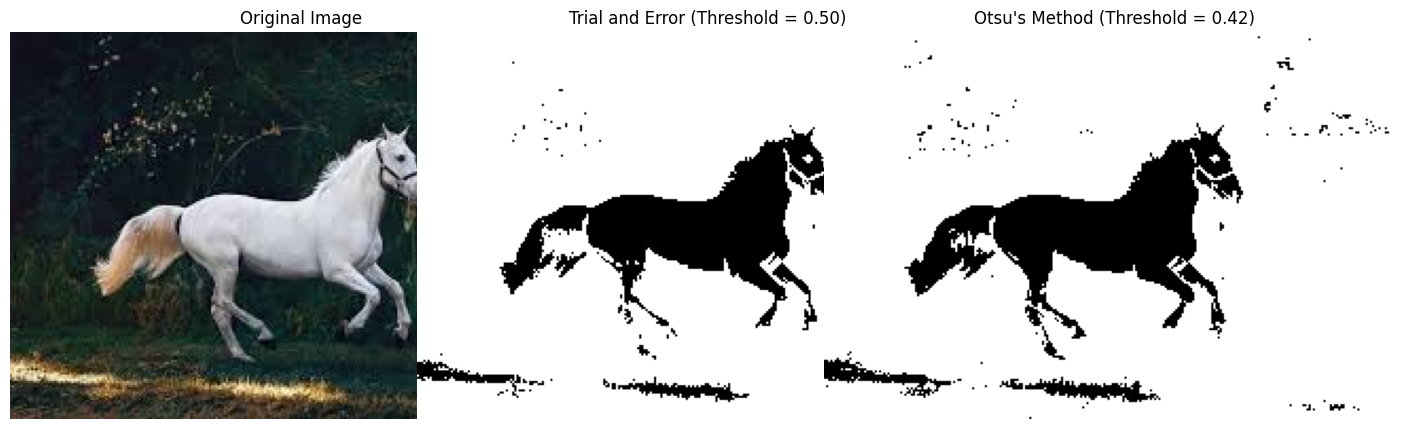

In [22]:
img_test2 = imread('images.jpeg')
img_test2_gs = rgb2gray(img_test2[:, :, :3])

# After several trial and error this is the best threshold
th = 0.5
img_test2_bn = img_test2_gs < th

# Using Otsu's Method
th_otsu = threshold_otsu(img_test2_gs)
img_test2_otsu = img_test2_gs < th_otsu

# Plot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=-0.3)
ax[0].set_title("Original Image")
ax[0].imshow(img_test2)
ax[0].set_axis_off()
ax[1].set_title(f"Trial and Error (Threshold = {th:.2f})")
ax[1].imshow(img_test2_bn, cmap='gray')
ax[1].set_axis_off()
ax[2].set_title(f"Otsu's Method (Threshold = {th_otsu:.2f})")
ax[2].imshow(img_test2_otsu, cmap='gray')
ax[2].set_axis_off()

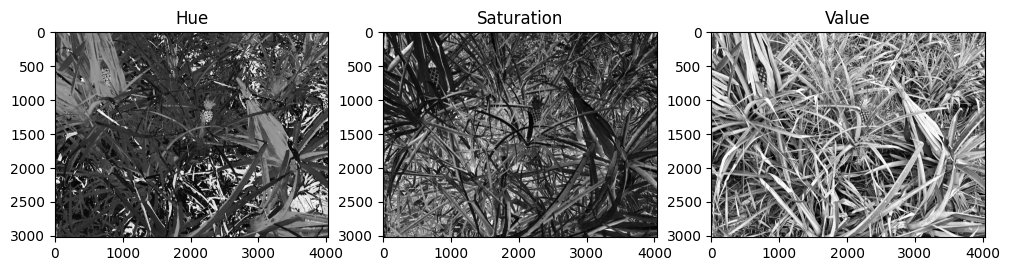

In [66]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray, rgb2hsv

# Load the image
img_test3 = imread('Image pineapple/IMG_4994.JPG')

# Convert the original RGB image to HSV
bags_hsv = rgb2hsv(img_test3[:,:,:3])

# Plot the HSV components
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(bags_hsv[:,:,0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(bags_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(bags_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value')
plt.show()


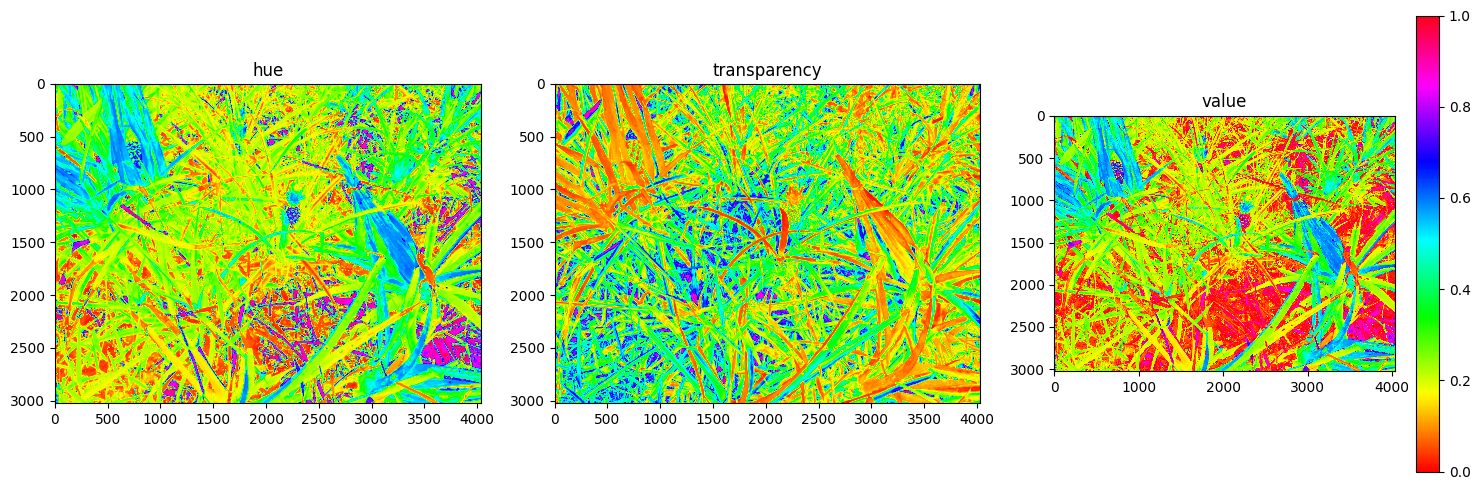

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(bags_hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(bags_hsv[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(bags_hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(bags_hsv[:,:,0],cmap='hsv')) 
fig.tight_layout()

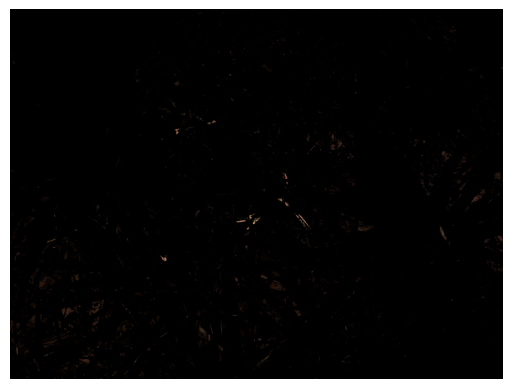

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2hsv

# Load the image
img_test3 = imread('Image pineapple/IMG_4994.JPG')

# Convert the original RGB image to HSV
bags_hsv = rgb2hsv(img_test3[:,:,:3])

# Define the masks
lower_mask = bags_hsv[:,:,0] > 0.0  # Refer to hue channel
upper_mask = bags_hsv[:,:,0] < 0.09  # Refer to hue channel
saturation_mask = bags_hsv[:,:,1] > 0.4  # Refer to saturation channel

# Combine masks
mask = upper_mask * lower_mask * saturation_mask

# Apply mask to each channel
red = img_test3[:,:,0] * mask
green = img_test3[:,:,1] * mask
blue = img_test3[:,:,2] * mask

# Stack the masked channels
bags_masked = np.dstack((red, green, blue))

# Plot the result
plt.imshow(bags_masked.astype(np.uint8))  # Ensure the image is in uint8 format for display
plt.axis('off')
plt.show()


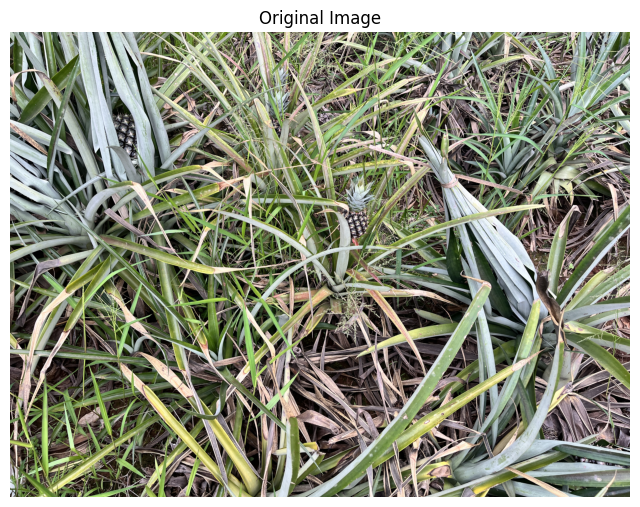

In [5]:
img = imread('Image pineapple/IMG_4994.JPG')[:, :, :3]
img_gs_1c = rgb2gray(img)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title("Original Image")
ax.imshow(img)
ax.set_axis_off()
plt.show()

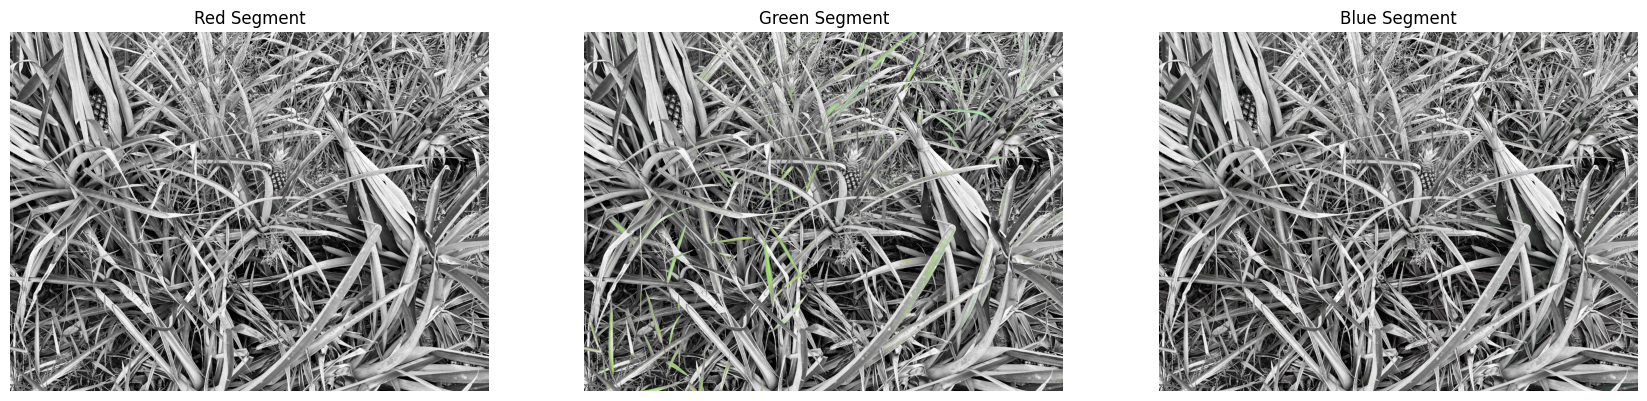

In [72]:
img_gs = ((np.stack([img_gs_1c] * 3, axis=-1) * 255)
          .astype('int').clip(0, 255))

# Red mask
red_mask = ((img[:, :, 0] > 150) &
            (img[:, :, 1] < 100) &
            (img[:, :, 2] < 200))
img_red = img_gs.copy()
img_red[red_mask] = img[red_mask]

# Green mask
green_mask = ((img[:, :, 0] < 190) &
              (img[:, :, 1] > 190) &
              (img[:, :, 2] < 190))
img_green = img_gs.copy()
img_green[green_mask] = img[green_mask]

# Blue mask
blue_mask = ((img[:, :, 0] < 80) &
             (img[:, :, 1] < 85) &
             (img[:, :, 2] > 50))
img_blue = img_gs.copy()
img_blue[blue_mask] = img[blue_mask]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
ax[0].set_title("Red Segment")
ax[0].imshow(img_red)
ax[0].set_axis_off()
ax[1].set_title("Green Segment")
ax[1].imshow(img_green)
ax[1].set_axis_off()
ax[2].set_title("Blue Segment")
ax[2].imshow(img_blue)
ax[2].set_axis_off()
plt.show()

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io, measure

In [7]:
import cv2
import numpy as np

# Red color in RGB
red_rgb = (255, 0, 0)

# Convert RGB to HSV
red_hsv = cv2.cvtColor(np.uint8([[red_rgb]]), cv2.COLOR_RGB2HSV)[0][0]

# Define range for red color in HSV
# Hue range for red color is around 0-10 and 170-180
# Saturation range can vary based on your specific shade of red
# Value range can vary based on lighting conditions and shade of red

# Adjust these values based on the specific shade and lighting conditions of your red color
hue_lower = 0    # Lower hue value for red
hue_upper = 10   # Upper hue value for red
saturation_lower = 100   # Lower saturation value for red
saturation_upper = 255  # Upper saturation value for red
value_lower = 100        # Lower value (brightness) for red
value_upper = 255       # Upper value (brightness) for red

# Create HSV lower and upper bounds arrays
hsv_lower = np.array([hue_lower, saturation_lower, value_lower])
hsv_upper = np.array([hue_upper, saturation_upper, value_upper])

# Example usage:
# hsv_lower and hsv_upper can now be used in cv2.inRange() function to detect red colors in an image.

print(f"HSV lower bound for red: {hsv_lower}")
print(f"HSV upper bound for red: {hsv_upper}")


HSV lower bound for red: [  0 100 100]
HSV upper bound for red: [ 10 255 255]


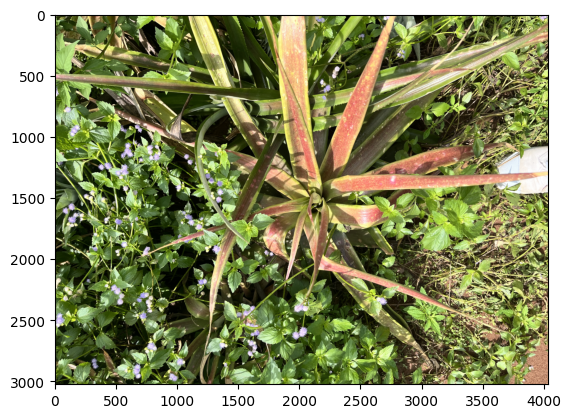

In [8]:
img1 = io.imread('Image pineapple/IMG_4910.JPG')
plt.imshow(img1)

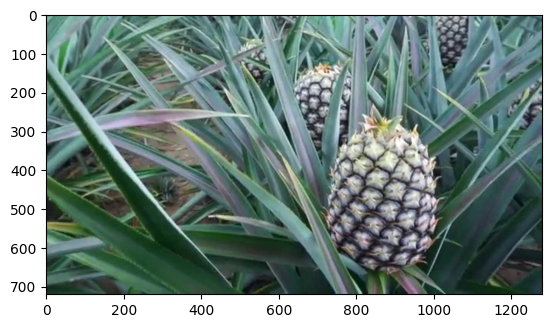

In [34]:
img2 = io.imread('maxresdefault.jpg')
plt.imshow(img2)

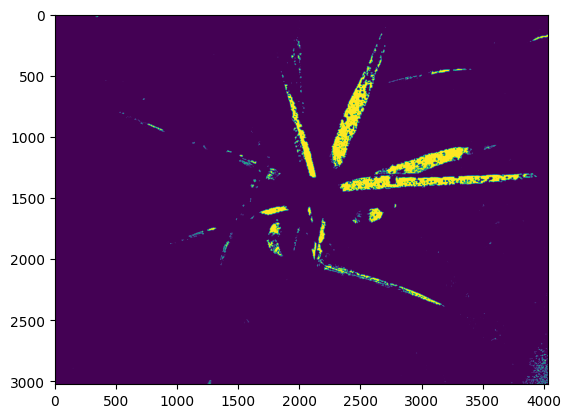

In [35]:
hsv = cv2.cvtColor(img1,cv2.COLOR_RGB2HSV)
mask1 = cv2.inRange(hsv, (0, 100, 100), (10, 255,255))

plt.imshow(mask1)

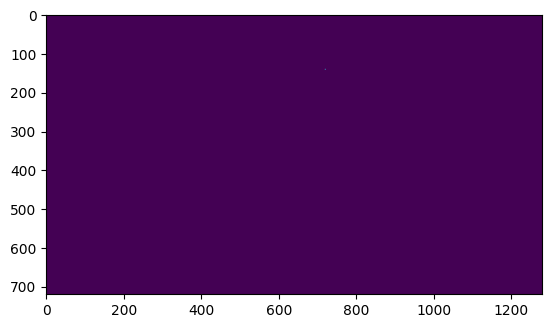

In [36]:
hsv = cv2.cvtColor(img2,cv2.COLOR_RGB2HSV)
mask2 = cv2.inRange(hsv, (0, 100, 100), (10, 255,255))

plt.imshow(mask2)

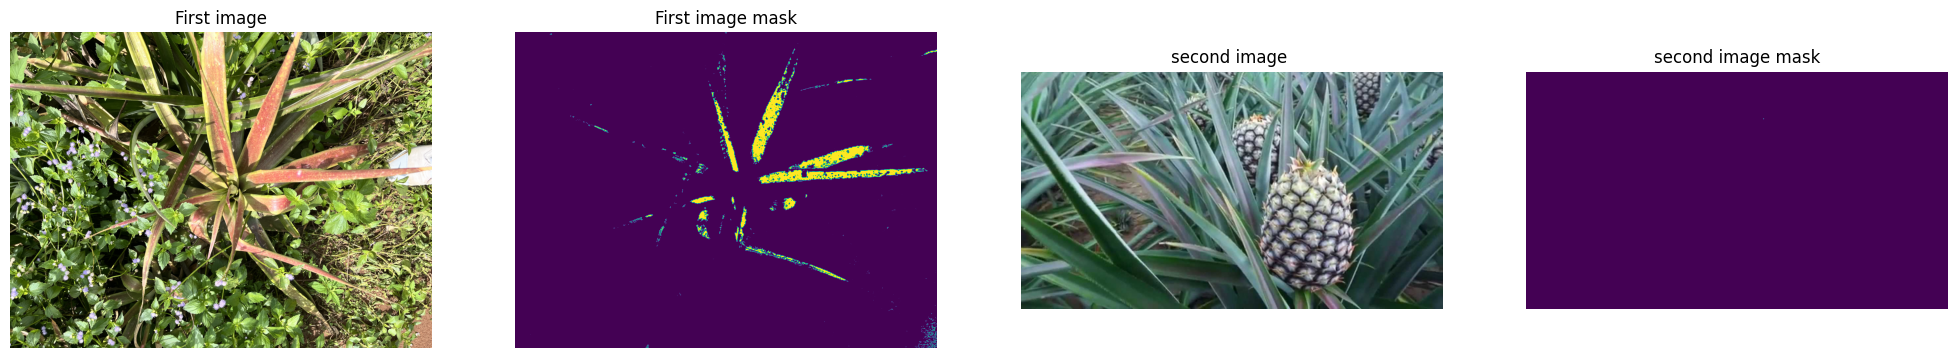

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(25, 7))

ax[0].set_title("First image")
ax[0].imshow(img1)
ax[0].set_axis_off()
ax[1].set_title('First image mask')
ax[1].imshow(mask1)
ax[1].set_axis_off()
ax[2].set_title('second image ')
ax[2].imshow(img2)
ax[2].set_axis_off()
ax[3].set_title('second image mask')
ax[3].imshow(mask2)
ax[3].set_axis_off()